In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
from scipy.optimize import curve_fit
from igraph import statistics

In [2]:
dir = "../"
files = ["ncldv.blastp.wo_self.m8", "ncldv.mmseqs.wo_self.m8", "ncldv.rapsearch.wo_self.m8", "ncldv.swipe.wo_self.m8"]
names = ["blastp", "mmseqs", "rapsearch", "swipe"]

# store graphs
Gs = []

for f in files:
    # read data as dataframe
    data = pd.read_table(dir + f, delimiter = '\t', header=None)
    data = data.iloc[:, [0,1]]
    data.columns=['source', 'target']

    # construct network
    G = nx.from_pandas_edgelist(data, 'source', 'target')
    Gs.append(G)

In [3]:
# methods for later use
def avg_std_degree(G):

    # degree values
    l_k = list(dict(G.degree()).values())
    s_k = set(l_k)

    # counting the number of neighbors and store it into a dict
    dict_k_frequency = {}
    for k in s_k:
        dict_k_frequency[k] = l_k.count(k)
    
    # total number of nodes
    n = len(G.nodes())
    
    # average degree computation
    average_degree = 0
    pks = []
    for key in dict_k_frequency.keys():
        pk = dict_k_frequency.get(key) / n
        pks.append(pk)
        average_degree += key * pk
        
    return average_degree

# define exponential function for knn=a*k^mu
def func(x, a, b):
    return a * np.power(x, b)

------------------------------------------------
blastp
------------------------------------------------
Number of edges: 564
Number of nodes: 444
Average degree: 2.540540540540541
[0.0, 0.08527131782945736, 0.13333333333333333, 0.14814814814814817, 0.24166666666666667, 0.2666666666666667, 0.2857142857142857, 0.2142857142857143, 0.35185185185185186]
{1: 145, 2: 129, 3: 70, 4: 45, 5: 24, 6: 14, 7: 8, 8: 6, 9: 3}
Clustering coefficient: 0.0927034177034177
Diameter:  20
Density:  0.005734854493319504
Number of connected components: 34
Size of largest component: 364


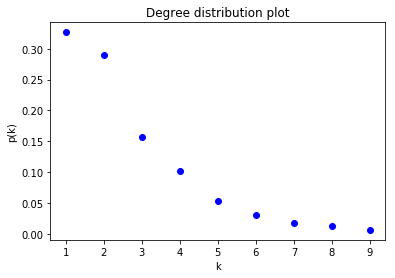

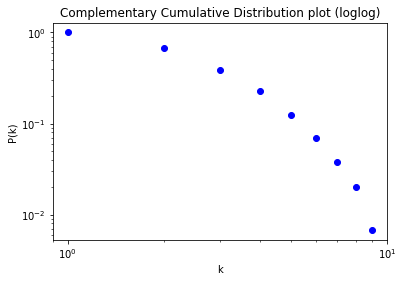

distr (3, 6, 8, 14, 24, 45, 70, 129, 145) deg (9, 8, 7, 6, 5, 4, 3, 2, 1)
1.843649060087639


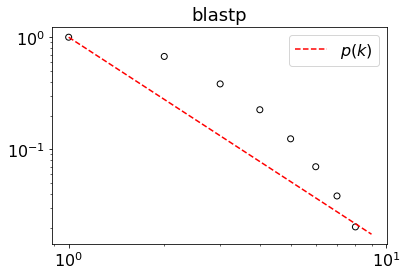

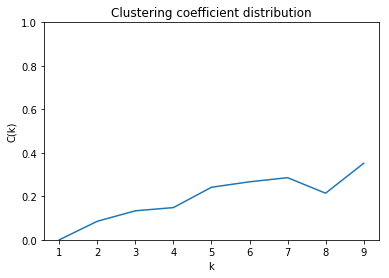

------------------------------------------------
mmseqs
------------------------------------------------
Number of edges: 210
Number of nodes: 345
Average degree: 1.2173913043478262
[0.0, 0.29411764705882354, 0.7037037037037036, 0.3888888888888889, 0.3]
{1: 303, 2: 17, 3: 18, 4: 6, 5: 1}
Clustering coefficient: 0.05884057971014493
Diameter:  6
Density:  0.003538928210313448
Number of connected components: 155
Size of largest component: 12


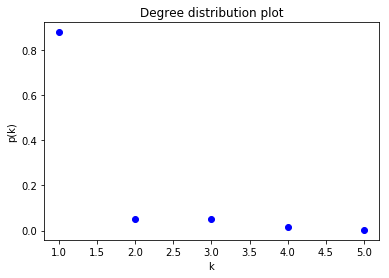

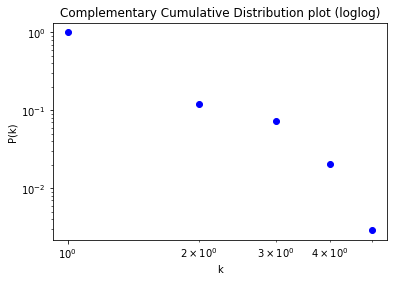

distr (1, 6, 18, 17, 303) deg (5, 4, 3, 2, 1)
3.312259862870489


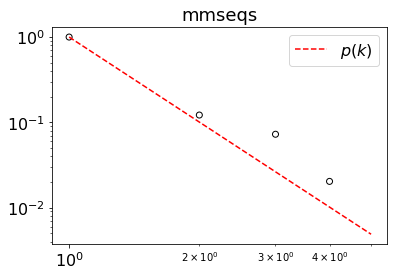

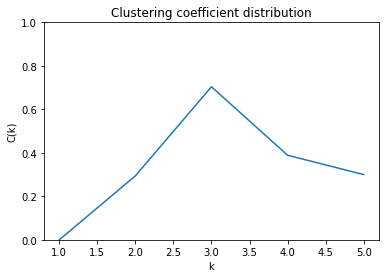

------------------------------------------------
rapsearch
------------------------------------------------
Number of edges: 275
Number of nodes: 365
Average degree: 1.5068493150684932
[0.0, 0.11267605633802817, 0.3854166666666667, 0.42857142857142855, 0.25, 0.2]
{1: 248, 2: 71, 3: 32, 4: 7, 5: 6, 6: 1}
Clustering coefficient: 0.06858447488584474
Diameter:  10
Density:  0.004139695920517839
Number of connected components: 112
Size of largest component: 36


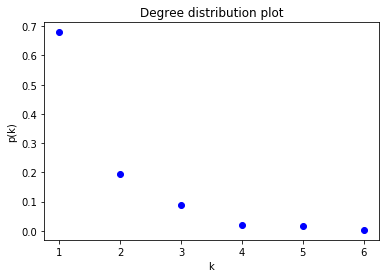

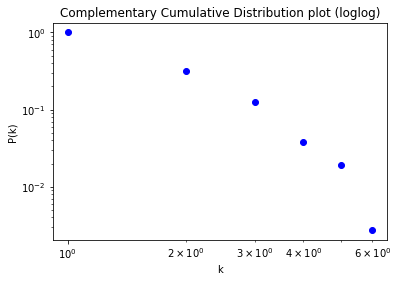

distr (1, 6, 7, 32, 71, 248) deg (6, 5, 4, 3, 2, 1)
2.4989756163312036


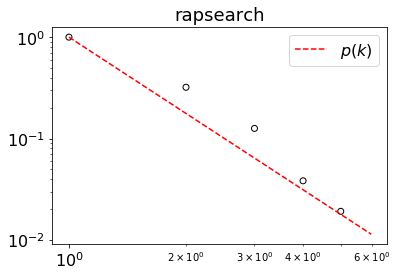

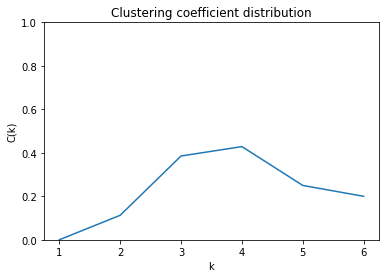

------------------------------------------------
swipe
------------------------------------------------
Number of edges: 1042
Number of nodes: 452
Average degree: 4.610619469026549
[0.0, 0.1111111111111111, 0.119047619047619, 0.15517241379310345, 0.11470588235294121, 0.16551724137931034, 0.11999999999999998, 0.1, 0.14087301587301584, 0.13703703703703704, 0.1041322314049587, 0.13636363636363635, 0.16346153846153846, 0.1978021978021978, 0.047619047619047616, 0.025, 0.09313725490196079, 0.0196078431372549, 0.1111111111111111, 0.07368421052631578, 0.09047619047619047, 0.05533596837944664, 0.056666666666666664]
{1: 84, 2: 72, 3: 70, 4: 58, 5: 34, 6: 29, 7: 25, 8: 20, 9: 14, 10: 12, 11: 11, 12: 5, 13: 4, 14: 1, 15: 2, 16: 1, 17: 3, 18: 1, 19: 2, 20: 1, 21: 1, 23: 1, 25: 1}
Clustering coefficient: 0.10231540716874599
Diameter:  10
Density:  0.010223103035535584
Number of connected components: 16
Size of largest component: 419


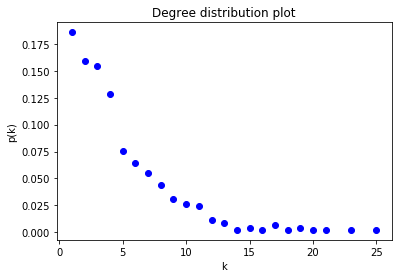

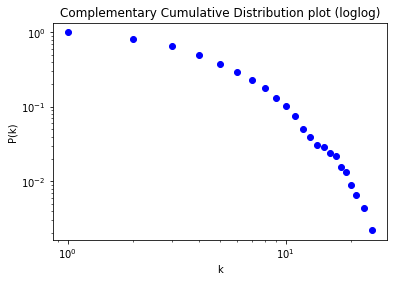

distr (1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 4, 5, 11, 12, 14, 20, 25, 29, 34, 58, 70, 72, 84) deg (25, 23, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
1.586905757341107


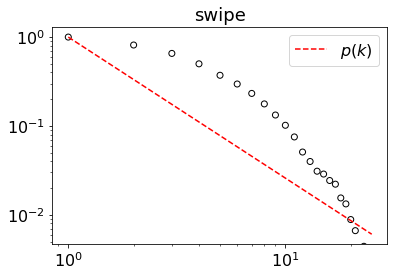

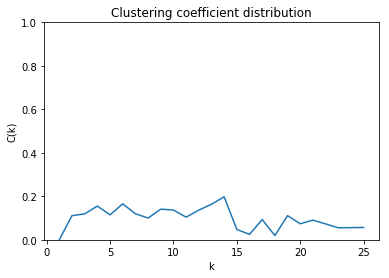

In [23]:
for i in range(len(Gs)):
    print('------------------------------------------------')
    print(names[i])
    print('------------------------------------------------')
    
    G = Gs[i]
    # print statistics
    print('Number of edges:', G.number_of_edges())
    print('Number of nodes:', G.number_of_nodes())

    print('Average degree:', avg_std_degree(G))

    #compute clustering coefficient
    cluster_dict = nx.clustering(G)
    #print(cluster_dict)
    
    cluster_k_dict = {}
    k_freq = {}
    # degree values
    l_k = list(dict(G.degree()).values())
    s_k = set(l_k)
    for s in s_k:
        cluster_k_dict[s] = 0
        k_freq[s] = 0
    
    
    for node in list(G.nodes()):
        k = G.degree(node)
        cluster_k_dict[k] += cluster_dict[node]
        k_freq[k] += 1
        
    cluster_result = []
    for j in cluster_k_dict.keys():
        cluster_result.append(cluster_k_dict[j] / k_freq[j])
    
    print(cluster_result)
    print(k_freq)
    
    clustering_coefficient = sum(cluster_dict.values()) / len(G.nodes())
    print('Clustering coefficient:', clustering_coefficient)

    max_component = 0
    # we look at components because the graph might not be connected
    diameters = []
    for component in list(nx.connected_components(G)):
        diameters.append(nx.diameter(G.subgraph(component)))
        size = G.subgraph(component).number_of_nodes()
        if size > max_component:
            max_component = size
            
    print('Diameter: ', max(diameters))

    # compute density
    print('Density: ', nx.density(G))
    
    # number of connected components
    print('Number of connected components:', len(list(nx.connected_components(G))))
    
    # size of largest component
    print('Size of largest component:', max_component)

    n_ = G.number_of_nodes()

    # plot cumulative degree distribution 
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.plot(deg, np.array(cnt)/n_, 'bo')
    plt.title("Degree distribution plot")
    plt.ylabel("p(k)")
    plt.xlabel("k")
    plt.savefig(names[i]+  "_degree_dist.pdf")
    plt.show()

    cs = np.cumsum(cnt)
    plt.loglog(deg, cs/max(cs), 'bo')
    plt.title("Complementary Cumulative Distribution plot (loglog)")
    plt.ylabel("P(k)")
    plt.xlabel("k")
    plt.savefig(names[i]+  "_degree_dist_log.pdf")
    plt.show()
    
    # estimate the degree exponent gamma
    print("distr",cnt, "deg", deg)
    deg_ = np.repeat(deg, cnt, axis=0)
    fit = statistics.power_law_fit(deg_, xmin=min(deg)).alpha
    print(fit)
    
    # generate x and y for the fit
    x_fit = np.arange(min(deg),max(deg),.01)
    y_fit = [func(z, 1, (-1)*fit) for z in x_fit]
    
    plt.scatter(deg, cs/max(cs), facecolors='none', edgecolors='k')
    plt.title(names[i], fontsize=18)
    plt.plot(x_fit,y_fit,'r--',label= '$p(k) \approx k ^{%.2f}$' %fit)
    ax = plt.gca()
    plt.loglog(basex=10, basey=10)
    plt.tick_params(axis='both', which='major', colors='k',labelsize=16)
    plt.legend(fontsize=16)
    plt.savefig(names[i]+  "_gamma_est_dist.pdf")
    plt.show()
    
    
    # plot C(k) against k
    plt.plot(list(cluster_k_dict.keys()), cluster_result)
    plt.title("Clustering coefficient distribution")
    plt.ylabel("C(k)")
    plt.xlabel("k")
    plt.savefig(names[i]+  "_clustering_dist.pdf")
    plt.ylim([0,1])
    plt.show()